In [18]:
import sys
sys.path.append('../')
import re
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [18, 12]

from src.data.make_dataset import get_sp500_company_info

In [8]:
sp500_tables = get_sp500_company_info()
current_companies = sp500_tables[0]
historical_changes = sp500_tables[1]

In [9]:
current_companies.head(1).T

,0
Symbol,MMM
Security,3M Company
SEC filings,reports
GICS Sector,Industrials
GICS Sub-Industry,Industrial Conglomerates
Headquarters Location,"St. Paul, Minnesota"
Date first added,1976-08-09
CIK,66740
Founded,1902


<AxesSubplot:xlabel='None-GICS Sub-Industry', ylabel='GICS Sector'>

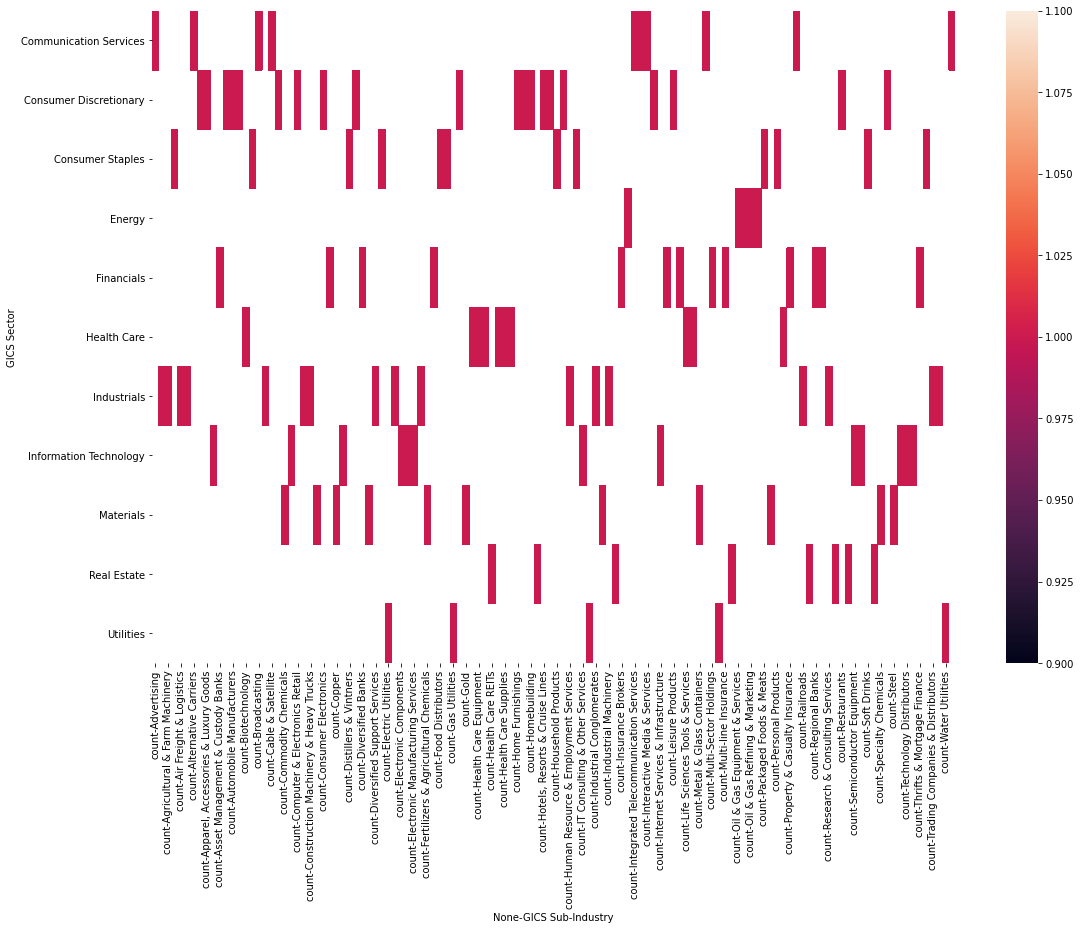

In [19]:
# number of companies by sector
industry_pivot_table = current_companies[['GICS Sector', 'GICS Sub-Industry']].assign(count=1).pivot_table(index='GICS Sector', columns='GICS Sub-Industry')
sns.heatmap(industry_pivot_table)

In [20]:
current_companies['GICS Sector'].value_counts().sort_values()


Energy                    25
Communication Services    26
Utilities                 28
Materials                 28
Real Estate               30
Consumer Staples          32
Consumer Discretionary    61
Health Care               63
Financials                65
Industrials               73
Information Technology    74
Name: GICS Sector, dtype: int64

In [21]:
current_companies['GICS Sub-Industry'].value_counts().sort_values()

Gold                                 1
Hotel & Resort REITs                 1
Trading Companies & Distributors     1
Alternative Carriers                 1
Metal & Glass Containers             1
                                    ..
Application Software                12
Semiconductors                      13
Electric Utilities                  13
Industrial Machinery                14
Health Care Equipment               20
Name: GICS Sub-Industry, Length: 124, dtype: int64

<AxesSubplot:xlabel='index', ylabel='Founded'>

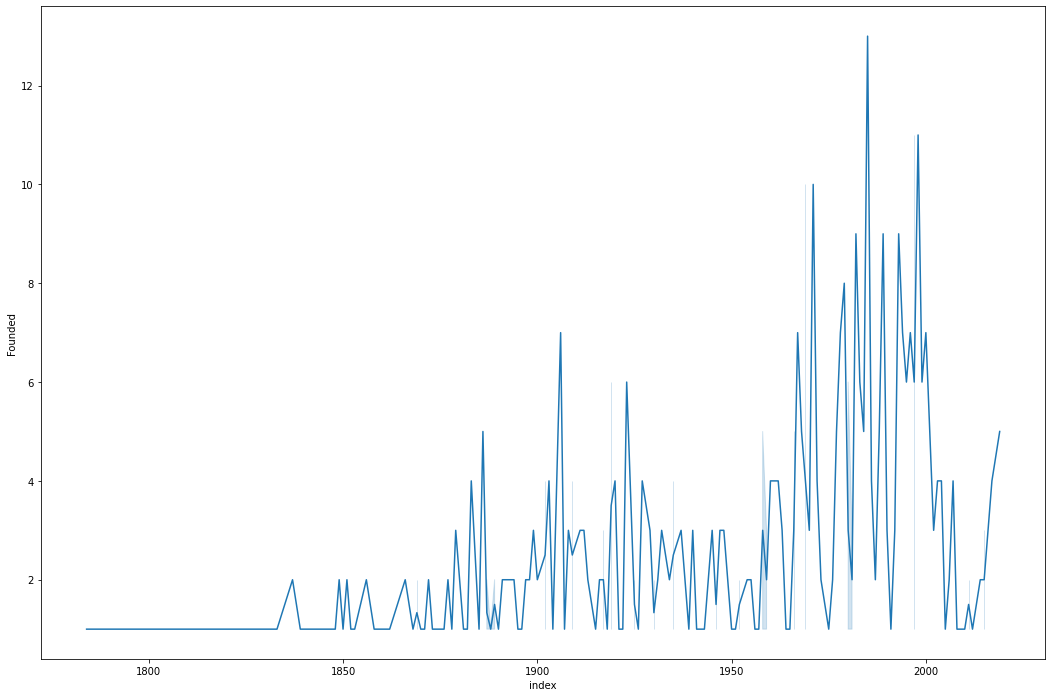

In [22]:
# company by founding date
year_founded = current_companies['Founded'].value_counts()
year_founded.index = [int(re.sub('[^0-9]', '', y)[-4:]) for y in year_founded.index]
sns.lineplot(data=year_founded.reset_index(), x='index', y='Founded')

<AxesSubplot:xlabel='Date first added', ylabel='years_to_add'>

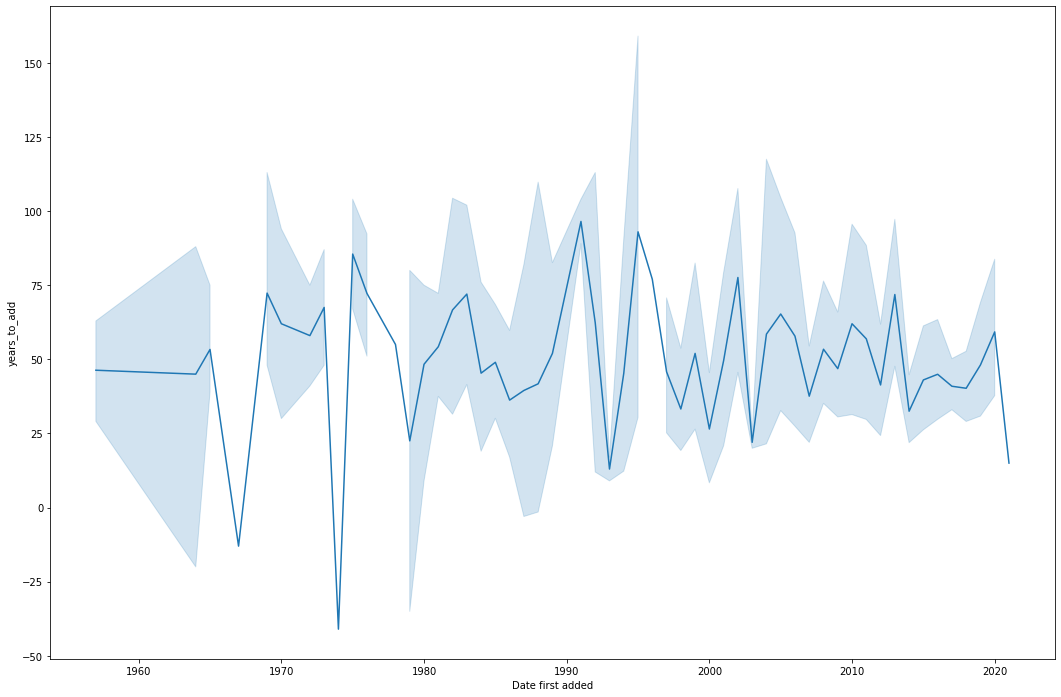

In [23]:
company_history = current_companies[['GICS Sector', 'Date first added', 'Founded']].dropna()
company_history['Founded'] = [int(re.sub('[^0-9]', '', y)[-4:])
                                       for y in company_history['Founded']]
company_history['Date first added'] = company_history['Date first added'].str.slice(0, 4).astype('int')
company_history['years_to_add'] = company_history['Date first added'] - company_history['Founded']
sns.lineplot(x='Date first added', y='years_to_add', data=company_history)

interesting that it takes around 50 years to be added to the S&P 500 and doesn't appear to have any trend.

<AxesSubplot:xlabel='GICS Sector', ylabel='years_to_add'>

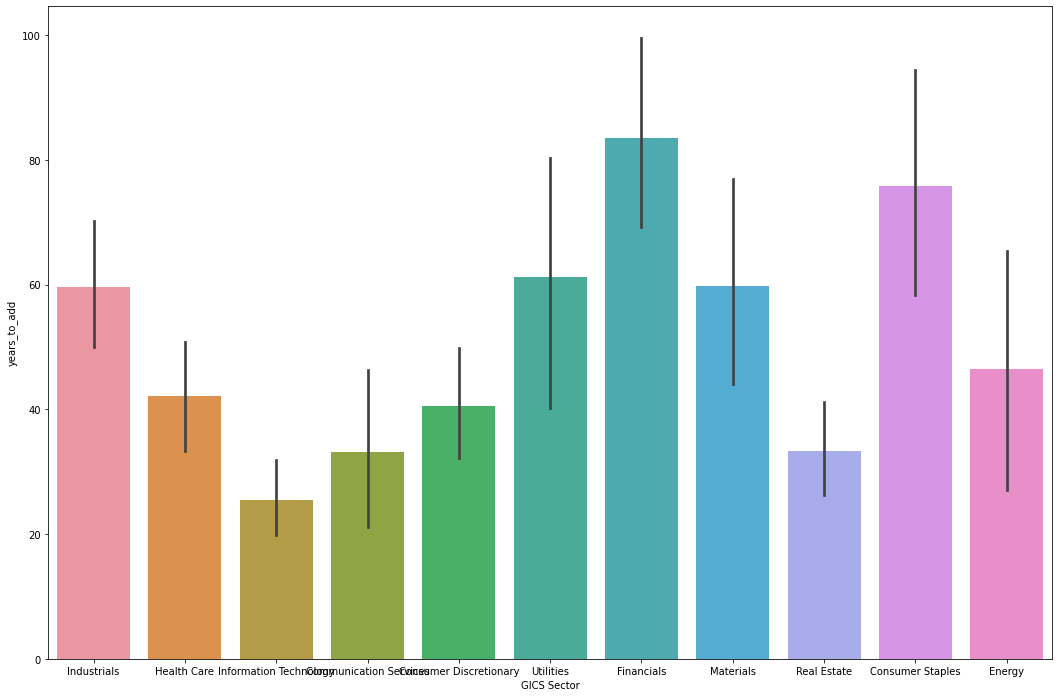

In [24]:
sns.barplot(x='GICS Sector', y='years_to_add', data=company_history)


However, it is clear that there are sector differences.

Only 0.074 or 37 out of 500 companies which were first added to the S&P500 are still part of the index today

In [26]:
len(current_companies[current_companies['Date first added'] == '1957-03-04'])/500


0.074